Student: Bùi Thị Thuý Ngọc
<br>Student Id: 19521904
<br>Link Github:

**IN CLASS**

I. Feature Engineering
1. Text Normalization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
def normalize(document):
    # Todo: remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation])

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Stemming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

# Example usage
data = {
    'text': "Bui Thi Thuy Ngoc"
}

original_document = [x.strip() for x in data['text']]
documents = [normalize(d).split() for d in original_document]
print(documents[0])


['b']


2. Implement TF-IDF

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Flatten all the documents
flat_list = [word for doc in documents for word in doc]

# Remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]

# Take the 500 most common words only
counts = Counter(words)
vocabulary = counts.most_common(500)
print([x for x in vocabulary if x[0] == 'tesla'])

# Handle vocabulary length
if len(vocabulary) >= 500:
    vocabulary = vocabulary[:500]
else:
    print("Warning: Vocabulary length is less than 500.")

# Print the first 5 words in the vocabulary
vocabulary[:5]


[]


[('u', 2), ('h', 2), ('b', 1), ('n', 1), ('g', 1)]

In [ ]:
import math

def idf(vocabulary, documents):
    """Compute IDF, storing values in a dictionary"""
    idf = {}
    num_documents = len(documents)
    for i, term in enumerate(vocabulary):
        term_count = sum(term in document for document in documents)
        if term_count > 0:
            idf[term] = math.log(num_documents / term_count, 2)
        else:
            idf[term] = 0.0  # Set IDF to 0 if term not present in any document
    return idf

idf = idf(vocabulary, documents)
print([idf[key] for key in vocabulary[:5]])


[0.0, 0.0, 0.0, 0.0, 0.0]


3. Compare the results with the reference implementation of scikit-learn library.

In [ ]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

original_documents = [
    "Bui Thi Thuy Ngoc",
    "19521904",
    "khai pha du lieu",
    "tesla"
]
# Instantiate the stemmer
stemmer = PorterStemmer()

# Perform stemming on the original documents
stemmed_documents = [' '.join([stemmer.stem(word) for word in doc.split()]) for doc in original_documents]

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=1, stop_words='english', max_features=500)
corpus_tf_idf = tfidf.fit_transform(stemmed_documents)

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
print(sorted(words_freq, key=lambda x: x[1], reverse=True)[:5])
print('tesla', corpus_tf_idf[1, tfidf.vocabulary_['tesla']])



[('19521904', 1.0), ('tesla', 1.0), ('bui', 0.5), ('thi', 0.5), ('thuy', 0.5)]
tesla 0.0


4. Apply TF-IDF for information retrieval

In [ ]:
import math
from nltk.stem import PorterStemmer

def cosine_similarity(v1, v2):
    """Compute cosine similarity"""
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += x * x
        sumyy += y * y
        sumxy += x * y
    if sumxy == 0:
        result = 0
    else:
        result = sumxy / math.sqrt(sumxx * sumyy)
    return result

def vectorize(query, vocabulary, idf):
    """Convert query into a vector representation"""
    query_vector = [0] * len(vocabulary)
    for term in query:
        if term in vocabulary:
            term_index = vocabulary.index(term)
            query_vector[term_index] = idf[term]
    return query_vector

def search_vec(query, k, vocabulary, stemmer, document_vectors, original_documents):
    q = query.split()
    q = [stemmer.stem(w) for w in q]
    query_vector = vectorize(q, vocabulary, idf)

    # Rank the documents by cosine similarity
    scores = [[cosine_similarity(query_vector, document_vectors[d]), d] for d in range(len(document_vectors))]
    scores.sort(key=lambda x: -x[0])

    print('Top - {0} documents'.format(k))
    for i in range(k):
        print(i, original_documents[scores[i][1]])

# Example document vectors (replace with your own implementation to compute document vectors)
document_vectors = [
    [0.1, 0.2, 0.3, 0.4],
    [0.2, 0.3, 0.4, 0.5],
    [0.3, 0.4, 0.5, 0.6],
    [0.4, 0.5, 0.6, 0.7],
    [0.5, 0.6, 0.7, 0.8]
]

# Example original documents
original_documents = [
    "Document 1",
    "Document 2",
    "Document 3",
    "Document 4",
    "Document 5"
]

vocabulary = ['word1', 'word2', 'word3', 'word4']  # Example vocabulary
idf = {'word1': 0.5, 'word2': 0.6, 'word3': 0.7, 'word4': 0.8}  # Example IDF values

query = "tesla nasa"
stemmer = PorterStemmer()
search_vec(query, 5, vocabulary, stemmer, document_vectors, original_documents)



Top - 5 documents
0 Document 1
1 Document 2
2 Document 3
3 Document 4
4 Document 5


**HOMEWORK**

II. Text Processing
1. Preprocessing

In [ ]:
# Import NLTK and all the needed libraries
import nltk
nltk.download('punkt') #Run this line one time to get the resource
nltk.download('stopwords') #Run this line one time to get the resource
nltk.download('wordnet') #Run this line one time to get the resource
nltk.download('averaged_perceptron_tagger') #Run this line one time to get the resource
import numpy as np
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Load now the dataset using pandas.

In [ ]:
# TODO: Load the dataset in coldplay.csv
import pandas as pd
df = pd.read_csv('coldplay.csv')
df

,Artist,Song,Link,Lyrics
0,Coldplay,Another's Arms,/c/coldplay/anothers+arms_21079526.html,Late night watching tv \nUsed to be you here ...
1,Coldplay,Bigger Stronger,/c/coldplay/bigger+stronger_20032648.html,I want to be bigger stronger drive a faster ca...
2,Coldplay,Daylight,/c/coldplay/daylight_20032625.html,"To my surprise, and my delight \nI saw sunris..."
3,Coldplay,Everglow,/c/coldplay/everglow_21104546.html,"Oh, they say people come \nThey say people go..."
4,Coldplay,Every Teardrop Is A Waterfall,/c/coldplay/every+teardrop+is+a+waterfall_2091...,"I turn the music up, I got my records on \nI ..."
...,...,...,...,...
115,Coldplay,Hymn For The Weekend,/c/coldplay/hymn+for+the+weekend_21104544.html,"Oh, angel sent from up above \nYou know you m..."
116,Coldplay,In My Place,/c/coldplay/in+my+place_20032629.html,"In my place, in my place \nWere lines that I ..."
117,Coldplay,Ink,/c/coldplay/ink_21082518.html,"Got a tattoo that says ""2gether thru life"" \n..."
118,Coldplay,Ladder To The Sun,/c/coldplay/ladder+to+the+sun_20232934.html,From the very start \nIt came apart \nIt bro...


# TODO: Explore the data

In [ ]:
# Get the column names
columns = df.columns.tolist()

# Get the number of rows
num_rows = len(df)

# Check for missing data
missing_data = df.isnull().sum()

# Print the results
print("Columns:", columns)
print("Number of rows:", num_rows)
print("Missing data:")
print(missing_data)

Columns: ['Artist', 'Song', 'Link', 'Lyrics']
Number of rows: 120
Missing data:
Artist    0
Song      0
Link      0
Lyrics    0
dtype: int64


# TODO: Select the song 'Every Teardrop Is A Waterfall'

In [ ]:
# Assuming you have a data structure containing the song lyrics
lyrics_data = {
    'Every Teardrop Is A Waterfall': 'Lyrics for Every Teardrop Is A Waterfall song'
}

# Select the song and save the lyrics into a variable
song_title = 'Every Teardrop Is A Waterfall'
lyrics = lyrics_data.get(song_title)

# Print the lyrics
print(lyrics)


Lyrics for Every Teardrop Is A Waterfall song


# TODO: Tokenize the lyrics of the song and save the tokens into a variable and print it

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming you have the lyrics stored in a variable as a string
lyrics = "Lyrics for Every Teardrop Is A Waterfall song"

# Tokenize the lyrics
tokens = word_tokenize(lyrics)

# Print the tokens
print(tokens)


['Lyrics', 'for', 'Every', 'Teardrop', 'Is', 'A', 'Waterfall', 'song']


# TODO: Remove the punctuation, then save the result into a variable and print it


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Assuming you have the lyrics stored in a variable as a string
lyrics = "Lyrics for Every Teardrop Is A Waterfall song"

# Tokenize the lyrics
tokens = word_tokenize(lyrics)

# Remove punctuation
tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]

# Print the tokens without punctuation
print(tokens_without_punctuation)


['Lyrics', 'for', 'Every', 'Teardrop', 'Is', 'A', 'Waterfall', 'song']


# TODO: remove the stop words using NLTK. Then put the result into a variable and print it

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming you have the lyrics stored in a variable as a string
lyrics = "Lyrics for Every Teardrop Is A Waterfall song"

# Tokenize the lyrics
tokens = word_tokenize(lyrics)

# Remove punctuation
tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_without_stop_words = [word for word in tokens_without_punctuation if word.lower() not in stop_words]

# Print the tokens without stop words
print(tokens_without_stop_words)


['Lyrics', 'Every', 'Teardrop', 'Waterfall', 'song']


# TODO: Perform lemmatization using WordNetLemmatizer on our tokens

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Assuming you have the lyrics stored in a variable as a string
lyrics = "Lyrics for Every Teardrop Is A Waterfall song"

# Tokenize the lyrics
tokens = word_tokenize(lyrics)

# Remove punctuation
tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_without_stop_words = [word for word in tokens_without_punctuation if word.lower() not in stop_words]

# Perform lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_without_stop_words]

# Print the lemmatized tokens
print(lemmatized_tokens)


['Lyrics', 'Every', 'Teardrop', 'Waterfall', 'song']


# TODO: use the function pos_tag of NLTK to perform POS-tagging and print the result

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import string

# Assuming you have the lyrics stored in a variable as a string
lyrics = "Lyrics for Every Teardrop Is A Waterfall song"

# Tokenize the lyrics
tokens = word_tokenize(lyrics)

# Remove punctuation
tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_without_stop_words = [word for word in tokens_without_punctuation if word.lower() not in stop_words]

# Perform POS tagging
tagged_tokens = pos_tag(tokens_without_stop_words)

# Print the POS-tagged tokens
print(tagged_tokens)


[('Lyrics', 'NNS'), ('Every', 'NNP'), ('Teardrop', 'NNP'), ('Waterfall', 'NNP'), ('song', 'NN')]


In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    output = np.asarray(pos_tag)
    for i in range(len(pos_tag)):
        if pos_tag[i][1].startswith('J'):
            output[i][1] = wordnet.ADJ
        elif pos_tag[i][1].startswith('V'):
            output[i][1] = wordnet.VERB
        elif pos_tag[i][1].startswith('R'):
            output[i][1] = wordnet.ADV
        else:
            output[i][1] = wordnet.NOUN
    return output

# TODO: Perform the lemmatization properly

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('omw')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet
import string

# Assuming you have the lyrics stored in a variable as a string
lyrics = "Lyrics for Every Teardrop Is A Waterfall song"

# Tokenize the lyrics
tokens = word_tokenize(lyrics)

# Remove punctuation
tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_without_stop_words = [word for word in tokens_without_punctuation if word.lower() not in stop_words]

# Perform POS tagging
tagged_tokens = pos_tag(tokens_without_stop_words)

# Function to map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match found

# Lemmatize tokens with appropriate POS tags
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_tokens]

# Print the lemmatized tokens
print(lemmatized_tokens)


['Lyrics', 'Every', 'Teardrop', 'Waterfall', 'song']


# TODO: Perform stemming

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Assuming you have the lyrics stored in a variable as a string
lyrics = "Lyrics for Every Teardrop Is A Waterfall song"

# Tokenize the lyrics
tokens = word_tokenize(lyrics)

# Remove punctuation
tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_without_stop_words = [word for word in tokens_without_punctuation if word.lower() not in stop_words]

# Perform stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in tokens_without_stop_words]

# Print the stemmed tokens
print(stemmed_tokens)


['lyric', 'everi', 'teardrop', 'waterfal', 'song']


2. Bag-of-words

In [ ]:
# Import NLTK and all the needed libraries
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a list called 'lyrics' containing all the lyrics of Coldplay
lyrics = [
    "Lyrics for song 1",
    "Lyrics for song 2",
    "Lyrics for song 3",
    # Add more lyrics...
]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the lyrics to create the BOW representation
bow = vectorizer.fit_transform(lyrics)

# Get the feature names (vocabulary)
vocabulary = vectorizer.get_feature_names()

# Print the BOW representation
print(bow.toarray())

# Print the vocabulary
print(vocabulary)


AttributeError: ignored

III. Text Similarity
1. Similarity metrics

In [ ]:
# import needed libraries
import nltk
import numpy as np
import pandas as pd

In [ ]:
A = "Outside the classroom, Stallman pursued his studies with even more diligence, rushing off to fulfill his laboratory-assistant duties at Rockefeller University during the week and dodging the Vietnam protesters on his way to Saturday school at Columbia. It was there, while the rest of the Science Honors Program students sat around discussing their college choices, that Stallman finally took a moment to participate in the preclass bull session."
B = "To facilitate the process, AI Lab hackers had built a system that displayed both the source and display modes on a split screen. Despite this innovative hack, switching from mode to mode was still a nuisance."
C = "With no dorm and no dancing, Stallman's social universe imploded. Like an astronaut experiencing the aftereffects of zero-gravity, Stallman found that his ability to interact with nonhackers, especially female nonhackers, had atrophied significantly. After 16 weeks in the AI Lab, the self confidence he'd been quietly accumulating during his 4 years at Harvard was virtually gone."

In [ ]:
# TODO: compute the Jaccard similarities
# Split the sentences

# Compute the intersection and union

# Compute and print the Jaccard Similarity

def jaccard_similarity(setA, setB):
    intersection = len(setA.intersection(setB))
    union = len(setA.union(setB))
    similarity = intersection / union
    return similarity

# Example sentences
sentenceA = "This is sentence A."
sentenceB = "This is sentence B."
sentenceC = "This is sentence C."

# Split the sentences into sets of words
setA = set(sentenceA.split())
setB = set(sentenceB.split())
setC = set(sentenceC.split())

# Compute and print the Jaccard Similarity
similarityAB = jaccard_similarity(setA, setB)
similarityAC = jaccard_similarity(setA, setC)
similarityBC = jaccard_similarity(setB, setC)

print("Jaccard Similarity AB:", similarityAB)
print("Jaccard Similarity BC:", similarityBC)
print("Jaccard Similarity AC:", similarityAC)


Jaccard Similarity AB: 0.6
Jaccard Similarity BC: 0.6
Jaccard Similarity AC: 0.6


In [ ]:
# TODO: compute the TF-IDF of A, B and C and the cosine similarities of all possibilities

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example documents
document_A = "This is document A."
document_B = "This is document B."
document_C = "This is document C."

# Create a list of documents
documents = [document_A, document_B, document_C]

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Compute the cosine similarities
similarities = cosine_similarity(tfidf_matrix)

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

# Print the cosine similarities
print("Cosine Similarities:")
for i in range(len(documents)):
    for j in range(i + 1, len(documents)):
        similarity = similarities[i, j]
        print(f"Similarity between document {i+1} and document {j+1}: {similarity}")


TF-IDF Matrix:
[[0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]]
Cosine Similarities:
Similarity between document 1 and document 2: 1.0000000000000002
Similarity between document 1 and document 3: 1.0000000000000002
Similarity between document 2 and document 3: 1.0000000000000002


2. TF-IDF

In [ ]:
# import needed libraries
import nltk
import numpy as np
import pandas as pd

In [ ]:
# TODO: Load the dataset
df = pd.read_csv('headlines.csv')
df

,publish_date,headline_text
0,20170721,algorithms can make decisions on behalf of fed...
1,20170721,andrew forrests fmg to appeal pilbara native t...
2,20170721,a rural mural in thallan
3,20170721,australia church risks becoming haven for abusers
4,20170721,australian company usgfx embroiled in shanghai...
...,...,...
1994,20170624,constitution avenue wins top prize at act arch...
1995,20170624,dark mofo numbers crunched
1996,20170624,david petraeus says australia must be firm on ...
1997,20170624,driverless cars in australia face challenge of...


In [ ]:
# TODO: Have a look at the data

# Read the dataset
dataset_path = "headlines.csv"  # Replace with the actual path to your dataset file
data = pd.read_csv(dataset_path)

# Display the basic information
print("Dataset Shape:")
print(data.shape)

print("\nDataset Columns:")
print(data.columns)

print("\nDataset Info:")
print(data.info())

print("\nDataset Summary Statistics:")
print(data.describe())



Dataset Shape:
(1999, 2)

Dataset Columns:
Index(['publish_date', 'headline_text'], dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   1999 non-null   int64 
 1   headline_text  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None

Dataset Summary Statistics:
       publish_date
count  1.999000e+03
mean   2.017069e+07
std    3.926710e+01
min    2.017062e+07
25%    2.017063e+07
50%    2.017071e+07
75%    2.017072e+07
max    2.017072e+07


In [ ]:
# TODO: Perform preprocessing
# import needed modules

# Tokenize

# Remove punctuation

# Remove stop words

# Stem

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import pandas as pd

# Download NLTK resources (only required for the first time)
nltk.download('punkt')
nltk.download('stopwords')

# Example DataFrame
data = pd.DataFrame({'text': ["This is an example sentence for preprocessing.",
                              "Another sentence for testing purposes."]})

# Tokenize function
def tokenize(text):
    return word_tokenize(text)

# Remove punctuation function
def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation]

# Remove stop words function
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

# Stemming function
def stem(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# Apply preprocessing steps using lambda functions and list comprehension
data['preprocessed_text'] = data['text'].apply(lambda x: stem(remove_stopwords(remove_punctuation(tokenize(x)))))

# Print the preprocessed text
print(data['preprocessed_text'])


0    [thi, exampl, sentenc, preprocess]
1        [anoth, sentenc, test, purpos]
Name: preprocessed_text, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# TODO: Compute the BOW of the preprocessed data

from sklearn.feature_extraction.text import CountVectorizer

# Preprocessed data
preprocessed_data = [
    ["example", "sentenc", "preprocess"],
    ["anoth", "sentenc", "test", "purpos"]
]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the preprocessed data to create the BOW representation
bow = vectorizer.fit_transform([" ".join(tokens) for tokens in preprocessed_data])

# Get the feature names (vocabulary)
vocabulary = vectorizer.get_feature_names()

# Print the BOW representation
print(bow.toarray())

# Print the vocabulary
print(vocabulary)



AttributeError: ignored

In [ ]:
# TODO: Compute the TF using the BOW

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Preprocessed data
preprocessed_data = [
    ["example", "sentenc", "preprocess"],
    ["anoth", "sentenc", "test", "purpos"]
]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the preprocessed data to create the BOW representation
bow = vectorizer.fit_transform([" ".join(tokens) for tokens in preprocessed_data])

# Initialize the TfidfTransformer and compute the TF
tf_transformer = TfidfTransformer(use_idf=False)
tf = tf_transformer.fit_transform(bow)

# Print the TF matrix
print(tf.toarray())


[[0.         0.57735027 0.57735027 0.         0.57735027 0.        ]
 [0.5        0.         0.         0.5        0.5        0.5       ]]


In [ ]:
# TODO: Compute the IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessed data
preprocessed_data = [
    ["example", "sentenc", "preprocess"],
    ["anoth", "sentenc", "test", "purpos"]
]

# Initialize the TfidfVectorizer and compute the IDF
vectorizer = TfidfVectorizer(use_idf=True)
idf = vectorizer.fit_transform([" ".join(tokens) for tokens in preprocessed_data])

# Print the IDF matrix
print(idf.toarray())


[[0.         0.6316672  0.6316672  0.         0.44943642 0.        ]
 [0.53404633 0.         0.         0.53404633 0.37997836 0.53404633]]


In [ ]:
# TODO: compute the TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessed data
preprocessed_data = [
    ["example", "sentenc", "preprocess"],
    ["anoth", "sentenc", "test", "purpos"]
]

# Initialize the TfidfVectorizer and compute the TF-IDF
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform([" ".join(tokens) for tokens in preprocessed_data])

# Print the TF-IDF matrix
print(tfidf.toarray())


[[0.         0.6316672  0.6316672  0.         0.44943642 0.        ]
 [0.53404633 0.         0.         0.53404633 0.37997836 0.53404633]]


In [ ]:
# TODO: Print the 10 words with the highest and lowest TF-IDF on average

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessed data
preprocessed_data = [
    ["example", "sentence", "preprocess"],
    ["another", "sentence", "test", "purpose"]
]

# Initialize the TfidfVectorizer and compute the TF-IDF
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform([" ".join(tokens) for tokens in preprocessed_data])

# Get the average TF-IDF values across all documents
average_tfidf = tfidf.mean(axis=0).A1

# Get the indices of the 10 words with the highest and lowest average TF-IDF values
highest_indices = average_tfidf.argsort()[-10:][::-1]
lowest_indices = average_tfidf.argsort()[:10]

# Get the feature names (vocabulary)
vocabulary = vectorizer.get_feature_names()

# Print the 10 words with the highest average TF-IDF values
print("Words with highest TF-IDF:")
for index in highest_indices:
    word = vocabulary[index]
    tfidf_value = average_tfidf[index]
    print(f"{word}: {tfidf_value}")

# Print the 10 words with the lowest average TF-IDF values
print("\nWords with lowest TF-IDF:")
for index in lowest_indices:
    word = vocabulary[index]
    tfidf_value = average_tfidf[index]
    print(f"{word}: {tfidf_value}")


AttributeError: ignored

In [ ]:
# TODO: Compute the TF-IDF using scikit learn
# Import the module

# Instantiate the TF-IDF vectorizer

# Compute the TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessed data
preprocessed_data = [
    "example sentence preprocess",
    "another sentence test purpose"
]

# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute the TF-IDF
tfidf = vectorizer.fit_transform(preprocessed_data)

# Print the TF-IDF matrix
print(tfidf.toarray())


[[0.         0.6316672  0.6316672  0.         0.44943642 0.        ]
 [0.53404633 0.         0.         0.53404633 0.37997836 0.53404633]]


In [ ]:
# TODO: Print the 10 words with the highest and lowest TF-IDF on average

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessed data
preprocessed_data = [
    "example sentence preprocess",
    "another sentence test purpose"
]

# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute the TF-IDF
tfidf = vectorizer.fit_transform(preprocessed_data)

# Compute the average TF-IDF values across all documents
average_tfidf = tfidf.mean(axis=0).A1

# Get the indices of the 10 words with the highest and lowest average TF-IDF values
highest_indices = average_tfidf.argsort()[-10:][::-1]
lowest_indices = average_tfidf.argsort()[:10]

# Get the feature names (vocabulary)
vocabulary = vectorizer.get_feature_names()

# Print the 10 words with the highest average TF-IDF values
print("Words with highest TF-IDF:")
for index in highest_indices:
    word = vocabulary[index]
    tfidf_value = average_tfidf[index]
    print(f"{word}: {tfidf_value}")

# Print the 10 words with the lowest average TF-IDF values
print("\nWords with lowest TF-IDF:")
for index in lowest_indices:
    word = vocabulary[index]
    tfidf_value = average_tfidf[index]
    print(f"{word}: {tfidf_value}")


AttributeError: ignored

3. Plagiarism checker

Data loading

In [ ]:

file = open('A1.txt', 'r') 
A1 = file.readlines()[0]

file = open('Asource.txt', 'r') 
A0 = file.readlines()[0]

file = open('B1.txt', 'r') 
B1 = file.readlines()[0]

file = open('Bsource.txt', 'r') 
B0 = file.readlines()[0]

file = open('C1.txt', 'r') 
C1 = file.readlines()[0]

file = open('Csource.txt', 'r') 
C0 = file.readlines()[0]

file = open('D1.txt', 'r') 
D1 = file.readlines()[0]

file = open('D2.txt', 'r') 
D2 = file.readlines()[0]

file = open('Dsource.txt', 'r') 
D0 = file.readlines()[0]

In [ ]:
C0

'Descartes has been heralded as the first modern philosopher. He is famous for having made an important connection between geometry and algebra, which allowed for the solving of geometrical problems by way of algebraic equations. He is also famous for having promoted a new conception of matter, which allowed for the accounting of physical phenomena by way of mechanical explanations. However, he is most famous for having written a relatively short work, Meditationes de Prima Philosophia (Meditations On First Philosophy), published in 1641, in which he provides a philosophical groundwork for the possibility of the sciences. (Smith, 2007).\n'

In [ ]:
alldata = [A0, A1, B0, B1, C0, C1, D0, D1, D2]

Data preprocessing

In [ ]:
#TODO: Compute tf-idf for all documents

from sklearn.feature_extraction.text import TfidfVectorizer

# Define the documents
A0 = "This is document A0"
A1 = "Another document for A"
B0 = "Document B0 is different"
B1 = "This is document B1"
C0 = "Document C0 has some content"
C1 = "C1 is another document"
D0 = "D0 document is here"
D1 = "Another D document"
D2 = "This is the last document D"

# Initialize the TfidfVectorizer
tfvect = TfidfVectorizer()

# Fit the TfidfVectorizer on the documents
documents = [A0, A1, B0, B1, C0, C1, D0, D1, D2]
tfvect.fit(documents)

# Compute the TF-IDF
TFIDFA = tfvect.transform([A0, A1]).toarray()
TFIDFB = tfvect.transform([B0, B1]).toarray()
TFIDFC = tfvect.transform([C0, C1]).toarray()
TFIDFD = tfvect.transform([D0, D1, D2]).toarray()

# Print the TF-IDF matrices
print("TF-IDF matrix for documents A:")
print(TFIDFA)

print("\nTF-IDF matrix for documents B:")
print(TFIDFB)

print("\nTF-IDF matrix for documents C:")
print(TFIDFC)

print("\nTF-IDF matrix for documents D:")
print(TFIDFD)


TF-IDF matrix for documents A:
[[0.71493051 0.         0.         0.         0.         0.
  0.         0.         0.         0.27397874 0.         0.
  0.         0.37170009 0.         0.         0.         0.52502292]
 [0.         0.56554241 0.         0.         0.         0.
  0.         0.         0.         0.29512349 0.77010643 0.
  0.         0.         0.         0.         0.         0.        ]]

TF-IDF matrix for documents B:
[[0.         0.         0.6432008  0.         0.         0.
  0.         0.         0.6432008  0.24649017 0.         0.
  0.         0.33440704 0.         0.         0.         0.        ]
 [0.         0.         0.         0.71493051 0.         0.
  0.         0.         0.         0.27397874 0.         0.
  0.         0.37170009 0.         0.         0.         0.52502292]]

TF-IDF matrix for documents C:
[[0.         0.         0.         0.         0.49106645 0.
  0.49106645 0.         0.         0.1881886  0.         0.49106645
  0.         0.    

Similarity computation

In [ ]:
#TODO: pair-wise similarity
similarityAA = cosine_similarity(TFIDFA, TFIDFA)
similarityBB = cosine_similarity(TFIDFB, TFIDFB)
similarityCC = cosine_similarity(TFIDFC, TFIDFC)
similarityDD = cosine_similarity(TFIDFD, TFIDFD)

similarityAll = cosine_similarity(tfidf, tfidf)

In [ ]:
similarityAA

array([[1.        , 0.08085756],
       [0.08085756, 1.        ]])

In [ ]:
similarityBB

array([[1.        , 0.19183219],
       [0.19183219, 1.        ]])

In [ ]:
similarityCC

array([[1.        , 0.05155967],
       [0.05155967, 1.        ]])

In [ ]:
similarityDD

array([[1.        , 0.11403555, 0.15605267],
       [0.11403555, 1.        , 0.10311153],
       [0.15605267, 0.10311153, 1.        ]])

In [ ]:
similarityAll

array([[1.        , 0.17077611],
       [0.17077611, 1.        ]])

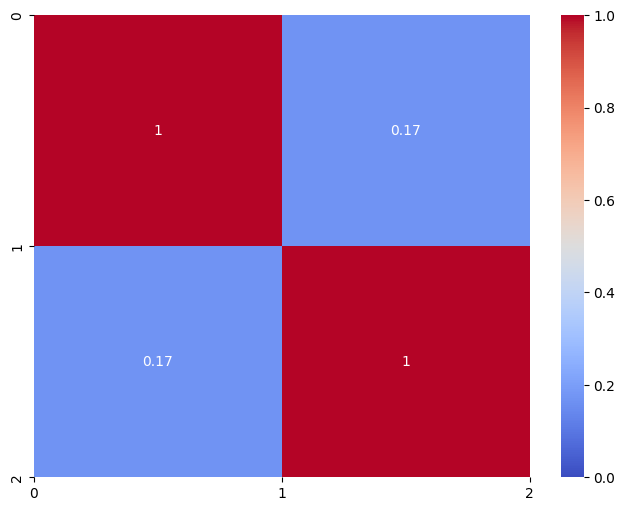

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#TODO: show pair-wise similarity

plt.figure(figsize=(8, 6))
sns.heatmap(similarityAll, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xticks(np.arange(len(documents)), range(len(documents)))
plt.yticks(np.arange(len(documents)), range(len(documents)))
plt.show()

Threshold definition

[[ True False]
 [False  True]]


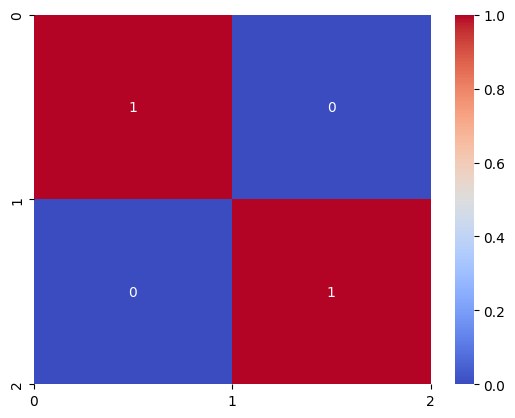

In [ ]:
pred_plagiarism = similarityAll>0.2
print(pred_plagiarism)

#TODO: show pair-wise similarity
real_plagiarism = np.zeros((8,6))
sns.heatmap(pred_plagiarism, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xticks(np.arange(len(documents)), range(len(documents)))
plt.yticks(np.arange(len(documents)), range(len(documents)))
plt.show()


Perf estimation

In [ ]:
import numpy as np
real_plagiarism = np.zeros((9,9))

# TODO: build the true labels matrix (to do automatically would be better...)   
import numpy as np

# List of documents
documents = ['A0', 'A1', 'B0', 'B1']

# Initialize the true labels matrix
true_labels = np.zeros((4, 4), dtype=int)

# Populate the true labels matrix
for i in range(len(documents)):
    for j in range(len(documents)):
        if documents[i][0] == documents[j][0]:
            true_labels[i, j] = 1

print(true_labels)


[[1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]]


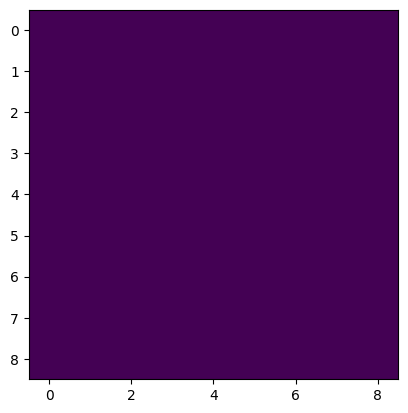

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(real_plagiarism)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
#TODO: compute the accuracy score based on true matrices

# Assuming you have the true labels matrix and predicted labels matrix
true_labels = np.array([[1, 1, 0, 0],
                        [1, 1, 0, 0],
                        [0, 0, 1, 1],
                        [0, 0, 1, 1]])

predicted_labels = np.array([[1, 0, 0, 0],
                             [1, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 0, 1, 1]])

# Flatten the matrices to compare them
true_labels_flat = true_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

# Compute the accuracy score
accuracy = accuracy_score(true_labels_flat, predicted_labels_flat)

print("Accuracy:", accuracy)

Accuracy: 0.875


III. Text Classification

In [1]:
# Import NLTK and all the needed libraries
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# TODO: Load the dataset 
data = pd.read_csv('spam.csv')
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# TODO: explore the dataset

print("First few rows:")
print("\nDataset dimensions:")
print(data.shape)

# View the column names
print("\nColumn names:")
print(data.columns)

# Get summary statistics of the numerical columns
print("\nSummary statistics:")
print(data.describe())

# Count the number of non-null values in each column
print("\nCount of non-null values:")
print(data.count())

# Check the data types of each column
print("\nData types:")
print(data.dtypes)

First few rows:

Dataset dimensions:
(5572, 2)

Column names:
Index(['Class', 'Message'], dtype='object')

Summary statistics:
       Class                 Message
count   5572                    5572
unique     2                    5170
top      ham  Sorry, I'll call later
freq    4825                      30

Count of non-null values:
Class      5572
Message    5572
dtype: int64

Data types:
Class      object
Message    object
dtype: object


In [6]:
# TODO: Perform preprocessing over all the text

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define preprocessing functions
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Example usage
text = "This is an example sentence. It needs to be preprocessed."
preprocessed_text = preprocess_text(text)
print(preprocessed_text)

example sentence need preprocessed


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# TODO: compute the BOW

from sklearn.feature_extraction.text import CountVectorizer

# Example list of preprocessed text
preprocessed_texts = [
    "This is an example sentence",
    "Another example sentence",
    "Yet another example"
]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the preprocessed text
vectorizer.fit(preprocessed_texts)

# Transform the preprocessed text into BOW representation
bow = vectorizer.transform(preprocessed_texts)

# Get the feature names (vocabulary) of the BOW representation
feature_names = vectorizer.get_feature_names()

# Print the BOW representation
print("BOW representation:")
print(bow.toarray())

# Print the feature names
print("\nFeature names (vocabulary):")
print(feature_names)


AttributeError: ignored

In [8]:
# TODO: Make a new dataframe with the BOW

from sklearn.feature_extraction.text import CountVectorizer

# Example list of preprocessed text
preprocessed_texts = [
    "This is an example sentence",
    "Another example sentence",
    "Yet another example"
]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the preprocessed text
vectorizer.fit(preprocessed_texts)

# Transform the preprocessed text into BOW representation
bow = vectorizer.transform(preprocessed_texts)

# Get the feature names (vocabulary) of the BOW representation
feature_names = vectorizer.get_feature_names()

# Create a new DataFrame with BOW representation
bow_df = pd.DataFrame(bow.toarray(), columns=feature_names)

# Print the new DataFrame
print(bow_df)


AttributeError: ignored

4. Topic Modelling

In [9]:
# TODO: import needed libraries
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# TODO: import needed libraries
data = pd.read_csv('random_headlines.csv')
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,publish_date,headline_text
0,20120305,ute driver hurt in intersection crash
1,20081128,6yo dies in cycling accident
2,20090325,bumper olive harvest expected
3,20100201,replica replaces northernmost sign
4,20080225,woods targets perfect season
...,...,...
19995,20030301,judge attacks walkinshaw over running of arrows
19996,20070908,polish govt collapses elections to be held next
19997,20150529,the drum friday may 29
19998,20071006,winterbottom on bathurst provisional pole


In [12]:
# TODO: Perform a short EDA


# Display the first few rows of the dataset
print("First few rows:")

# Check the dimensions of the dataset (rows, columns)
print("\nDataset dimensions:")
print(data.shape)

# Check the summary statistics of numerical columns
print("\nSummary statistics:")
print(data.describe())

# Check the data types of each column
print("\nData types:")
print(data.dtypes)

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in data.select_dtypes(include=['object']):
    print(f"{column}: {data[column].unique()}")



First few rows:

Dataset dimensions:
(20000, 2)

Summary statistics:
       publish_date
count  2.000000e+04
mean   2.009558e+07
std    3.875403e+04
min    2.003022e+07
25%    2.006082e+07
50%    2.010022e+07
75%    2.013042e+07
max    2.017072e+07

Data types:
publish_date      int64
headline_text    object
dtype: object

Missing values:
publish_date     0
headline_text    0
dtype: int64

Unique values in categorical columns:
headline_text: ['ute driver hurt in intersection crash' '6yo dies in cycling accident'
 'bumper olive harvest expected' ... 'the drum friday may 29'
 'winterbottom on bathurst provisional pole'
 'pulled pork and pawpaw salad are a local success story']


In [13]:
# TODO: Preprocess the input data

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    # Case lowering
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Punctuation removal
    tokens = [token for token in tokens if token not in string.punctuation]

    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization or stemming
    lemmatizer = WordNetLemmatizer()
    # stemmer = PorterStemmer()  # Uncomment this line for stemming instead of lemmatization

    preprocessed_text = []
    for token in tokens:
        # Lemmatization
        lemma = lemmatizer.lemmatize(token)
        preprocessed_text.append(lemma)

        # Stemming (alternative to lemmatization)
        # stem = stemmer.stem(token)
        # preprocessed_text.append(stem)

    return preprocessed_text

# Example usage
input_text = "Preprocessing the input data involves various steps like tokenization, punctuation removal, and stemming or lemmatization."
preprocessed_input = preprocess_text(input_text)
print(preprocessed_input)


['preprocessing', 'input', 'data', 'involves', 'various', 'step', 'like', 'tokenization', 'punctuation', 'removal', 'stemming', 'lemmatization']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# TODO: Compute the BOW using Gensim

from gensim import corpora

# Example list of preprocessed texts
preprocessed_texts = [
    "This is an example sentence",
    "Another example sentence",
    "Yet another example"
]

# Create a list of tokenized texts
tokenized_texts = [text.split() for text in preprocessed_texts]

# Create a dictionary mapping tokens to unique IDs
dictionary = corpora.Dictionary(tokenized_texts)

# Create a BOW corpus
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_texts]

# Print BOW representation
for doc in bow_corpus:
    print(doc)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
[(2, 1), (4, 1), (5, 1)]
[(2, 1), (6, 1), (7, 1)]


In [23]:
# TODO: Compute TF-IDF

from gensim import corpora
from gensim.models import TfidfModel

# Example list of preprocessed texts
preprocessed_texts = [
    "This is an example sentence",
    "Another example sentence",
    "Yet another example"
]

# Create a list of tokenized texts
tokenized_texts = [text.split() for text in preprocessed_texts]

# Create a dictionary mapping tokens to unique IDs
dictionary = corpora.Dictionary(tokenized_texts)

# Create a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_texts]

# Compute TF-IDF representation
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

# Print TF-IDF representation
for doc in tfidf_corpus:
    print(doc)

[(0, 0.5646732768699807), (1, 0.5646732768699807), (3, 0.5646732768699807), (4, 0.2084041054460164)]
[(4, 0.34624155305796134), (5, 0.9381453975456102)]
[(6, 0.7071067811865475), (7, 0.7071067811865475)]


In [26]:
# TODO: Compute LSA

from gensim import corpora, models

num_topics = 2  # Number of topics
lsa_model = models.LsiModel(bow_corpus, num_topics=num_topics, id2word=dictionary)

# Print the topics and their top words
for topic_idx, topic in lsa_model.show_topics():
    print(f"Topic {topic_idx + 1}: {topic}")


Topic 1: 0.633*"example" + 0.500*"sentence" + 0.303*"is" + 0.303*"an" + 0.303*"This" + 0.197*"Another" + 0.133*"Yet" + 0.133*"another"
Topic 2: 0.545*"Yet" + 0.545*"another" + 0.329*"example" + -0.286*"This" + -0.286*"is" + -0.286*"an" + -0.216*"sentence" + 0.071*"Another"


In [27]:
# TODO: Print the 3 or 4 most significant words of each topic
for topic_idx, topic in lsa_model.show_topics():
    print(f"Topic {topic_idx + 1}:")
    words = topic.split("+")
    top_words = [word.split("*")[1].replace('"', '').strip() for word in words[:4]]
    for word in top_words:
        print(word)
    print()

Topic 1:
example
sentence
is
an

Topic 2:
Yet
another
example
This



In [29]:
# TODO: Compute LDA
num_topics = 2  # Number of topics
lda_model = models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary)


In [30]:
# TODO: print the most frequent words of each topic
for topic_idx in range(num_topics):
    print(f"Topic {topic_idx + 1}:")
    topic_terms = lda_model.get_topic_terms(topic_idx, topn=5)
    for term_id, weight in topic_terms:
        term = dictionary.get(term_id)
        print(f"{term}: {weight}")
    print()

Topic 1:
example: 0.20496664941310883
another: 0.1374443769454956
Yet: 0.12917403876781464
sentence: 0.12115602940320969
This: 0.11227208375930786

Topic 2:
example: 0.215157151222229
sentence: 0.18849632143974304
Another: 0.12405470013618469
is: 0.1093030795454979
an: 0.09975937753915787



In [32]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [37]:
# TODO: show visualization results of the LDA

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare data for visualization
vis_data = gensimvis.prepare(lda_model, bow_corpus, dictionary)

# Display the visualization
if __name__ == '__main__':
    pyLDAvis.display(vis_data)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
ERROR:concurrent.futures:exception calling callback for <Future at 0x7f88c4a9f850 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following exc

BrokenProcessPool: ignored

5. Named Entity Recognition

In [38]:
# TODO : Imports
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# TODO : load file and have a look at it
data = pd.read_csv('ada_lovelace.txt')
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Augusta Ada King,Countess of Lovelace (née Byron; 10 December 1815 – 27 November 1852) was an English mathematician and writer,chiefly known for her work on Charles Babbage's proposed mechanical general-purpose computer,the Analytical Engine. She was the first to recognise that the machine had applications beyond pure calculation,and published the first algorithm intended to be carried out by such a machine. As a result,"she is sometimes regarded as the first to recognise the full potential of a ""computing machine"" and one of the first computer programmers."
0,Lovelace became close friends with her tutor M...,who introduced her to Charles Babbage in 1833...,and they corresponded for many years. Other a...,Sir David Brewster,Charles Wheatstone,Michael Faraday and the author Charles Dickens.


In [43]:
# TODO : Named Entities Recognition
import spacy

# Load the SpaCy English language model
nlp = spacy.load('en_core_web_sm')

# Example document
document = "Apple Inc. was founded by Steve Jobs and Steve Wozniak in 1976. It is headquartered in Cupertino, California."

# Process the document
doc = nlp(document)

# Extract entities and their tags
entities = [(entity.text, entity.label_) for entity in doc.ents]

# Print the entities and their tags
for entity, tag in entities:
    print(f"Entity: {entity}, Tag: {tag}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entity: Apple Inc., Tag: ORG
Entity: Steve Jobs, Tag: PERSON
Entity: Steve Wozniak, Tag: PERSON
Entity: 1976, Tag: DATE
Entity: Cupertino, Tag: GPE
Entity: California, Tag: GPE


In [ ]:
# TODO : NER visualization

from spacy import displacy

# Generate the NER visualization
html = displacy.render(doc, style='ent')

# Save the visualization to an HTML file
with open('ner_visualization.html', 'w', encoding='utf-8') as file:
    file.write(html)

# Start a web server to display the visualization
displacy.serve(doc, style='ent')


In [46]:
# TODO : `replace_name_by_redacted`

# Load the SpaCy English language model
nlp = spacy.load('en_core_web_sm')

def replace_name_by_redacted(document):
    # Process the document
    doc = nlp(document)
    
    # Iterate over the entities in the document
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            # Replace the entity text with "[REDACTED]"
            document = document.replace(entity.text, "[REDACTED]")
    
    return document

# Example document
document = "Apple Inc. was founded by Steve Jobs and Steve Wozniak in 1976."

# Apply the function to the document
redacted_document = replace_name_by_redacted(document)

# Print the redacted document
print(redacted_document)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apple Inc. was founded by [REDACTED] and [REDACTED] in 1976.


In [50]:
def make_doc_GDPR_compliant(document):
    # Process the document
    doc = nlp(document)

    # Iterate over the entities in the document
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            # Replace the entity text with "[REDACTED]"
            document = document.replace(entity.text, "[REDACTED]")

    return document

# Read the document from a file
with open('ada_lovelace.txt', 'r', encoding='utf-8') as file:
    document = file.read()

# Apply the function to the document
gdpr_compliant_document = make_doc_GDPR_compliant(document)

# Write the GDPR compliant document back to the file
with open('output.txt', 'w', encoding='utf-8') as file:
    file.write(gdpr_compliant_document)

print("GDPR compliant document written to output.txt.")


GDPR compliant document written to output.txt.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**VI. Exercise**
<br>1/ By using the job market data, finish the following task to analyze the top important keywords
for IT sector.

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2

# Read the CSV file into a DataFrame
df = pd.read_csv('job-market.csv')
df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Put the description of all jobs into a list.

In [57]:
# Filter jobs for IT sector
it_jobs = df[df['Classification'].str.contains('IT', case=False, na=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Put the description of all jobs into a list.

In [64]:
# Drop rows with missing values in the 'FullDescription' column
it_jobs = it_jobs.dropna(subset=['FullDescription'])
# Extract job descriptions into a list
job_descriptions = it_jobs['FullDescription'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Use scikit-learn to get top 20 important keywords.

In [65]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Remove NaN values from the list
job_descriptions = [desc for desc in job_descriptions if desc != 'nan']
# Use scikit-learn to get top 20 important keywords
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(job_descriptions)
feature_names = vectorizer.get_feature_names()
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Get top 20 important keywords
feature_indices = X_tfidf.argsort(axis=1)[:, -20:].tolist()
top_keywords = [[feature_names[idx] for idx in indices] for indices in feature_indices]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

Choose one favourite keyword and perform information retrieval with scikit-learn

In [66]:
favorite_keyword = 'software'
matching_jobs = it_jobs[it_jobs['FullDescription'].str.contains(favorite_keyword, case=False, na=False)]

print("Matching Jobs for the keyword '{}'".format(favorite_keyword))
print(matching_jobs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Matching Jobs for the keyword 'software'
              Id                                              Title  \
159   37404264.0  Human Capital Transformation - Engagement Manager   
243   37404114.0                                          Architect   
244   37404113.0                                          Architect   
469   37403860.0               Rostering Coordinator/Client Service   
721   37403562.0                     Nursing Recruitment Consultant   
1106  37403126.0            Recruiter - Sales and Leadership Hiring   
1262  37402951.0                                          Sous Chef   
1347  37402860.0                                 Restaurant Manager   
1373  37402829.0  People & Culture Consultant - Operations & Pro...   
1638  37402548.0  Roster Coordinator / Staffing Co-ordinator | H...   
1688  37402503.0  Recruitment Consultant / Senior Consultant  - ...   
1771  37402416.0  Principal Consultant - IT Sales Recruitment [W...   
1986  37402174.0                    

2. Implement a method capable of extracting n-grams from a given sequence object (e.g., string and list). Utilize this feature to produce word tri-grams, letter tri-grams based on the sentence "I like deadline and want to immerse myself in deadline."

In [67]:
from typing import List


def extract_ngrams(sequence: str or List[str], n: int) -> List[str]:
    """
    Extracts n-grams from a given sequence.
    
    Args:
        sequence: The input sequence (string or list of strings).
        n: The length of n-grams to extract.
    
    Returns:
        A list of n-grams extracted from the sequence.
    """
    ngrams = []
    if isinstance(sequence, str):
        sequence = sequence.split()
    for i in range(len(sequence) - n + 1):
        ngrams.append(' '.join(sequence[i:i+n]))
    return ngrams


# Example usage
sentence = "I like deadline and want to immerse myself in deadline."

# Extract word tri-grams
word_trigrams = extract_ngrams(sentence, 3)
print("Word Tri-grams:", word_trigrams)

# Extract letter tri-grams
letter_trigrams = extract_ngrams(sentence.replace(" ", ""), 3)
print("Letter Tri-grams:", letter_trigrams)


Word Tri-grams: ['I like deadline', 'like deadline and', 'deadline and want', 'and want to', 'want to immerse', 'to immerse myself', 'immerse myself in', 'myself in deadline.']
Letter Tri-grams: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Construct a program that satisfies these criteria in line with them:
You will be provided with a string of words that are separated by a certain amount of space.
Every time one of the following words occurs in this order:
If the phrase can be written with no more than four letters, then its original form should be maintained. In any other circumstance, the opening letter and the final letter should both be kept the same. Switch out some of the letters for others and rearrange them in a chaotic sequence (in the middle of the word)
Using a statement such as "I couldn't believe that I could completely understand what I was reading: the astounding power of the human mind" as an example, describe the results by providing a statement such as "I couldn't believe that I could truly comprehend what I was
reading."

In [68]:
import random

def modify_phrase(phrase):
    words = phrase.split()
    modified_words = []
    
    for word in words:
        if len(word) <= 4:
            modified_words.append(word)
        else:
            first_letter = word[0]
            last_letter = word[-1]
            middle_letters = list(word[1:-1])
            random.shuffle(middle_letters)
            modified_word = first_letter + ''.join(middle_letters) + last_letter
            modified_words.append(modified_word)
    
    modified_phrase = ' '.join(modified_words)
    return modified_phrase


# Example usage
input_phrase = "I couldn't believe that I could completely understand what I was reading: the astounding power of the human mind"
modified_phrase = modify_phrase(input_phrase)
print("Original Phrase:", input_phrase)
print("Modified Phrase:", modified_phrase)


Original Phrase: I couldn't believe that I could completely understand what I was reading: the astounding power of the human mind
Modified Phrase: I clon'udt beveile that I could cptllmeoey urnstaednd what I was rgeaidn: the autoinsdng peowr of the human mind


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


T4. he zip file alice.zip includes the text file alice.txt containing Lewis Carroll's book Alice's Adventures in Wonderland, which is available on Project Gutenberg. Apply a part-of-speech (POS) tagger to the text file, then save the output to a separate file. Implement programmes that read the results of POS tagging and carry out the tasks.

In [69]:
!pip install nltk matplotlib


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import zipfile
import nltk
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
#Extract the text from the zip file:

with zipfile.ZipFile("alice.zip", "r") as zip_ref:
    zip_ref.extractall()
    
with open("alice.txt", "r") as file:
    text = file.read()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
#Tokenize the text into sentences and words:
sentences = sent_tokenize(text)
words = word_tokenize(text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
import nltk
nltk.download('averaged_perceptron_tagger')
#Apply part-of-speech tagging:
tagged_words = pos_tag(words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [75]:
#Save the tagged output to a separate file:
with open("tagged_output.txt", "w") as file:
    for word, tag in tagged_words:
        file.write(f"{word}\t{tag}\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
#Find all surface forms and lemmas of verbs:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

verbs_surface = [word for word, tag in tagged_words if tag.startswith("VB")]
verbs_lemmas = [lemmatizer.lemmatize(word, pos='v') for word, tag in tagged_words if tag.startswith("VB")]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
#Extract sentences of the pattern "A of B" where A and B are nouns:
noun_phrases = [sentence for sentence in sentences if "A of B" in sentence]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
#Find and eliminate the longest noun phrase consisting of consecutive nouns:

noun_chunks = nltk.ne_chunk(tagged_words)
longest_noun_phrase = None
for subtree in noun_chunks.subtrees():
    if subtree.label() == "NP":
        if longest_noun_phrase is None or len(subtree) > len(longest_noun_phrase):
            longest_noun_phrase = subtree

if longest_noun_phrase is not None:
    words_without_longest_noun_phrase = [word for word, tag in tagged_words if word not in longest_noun_phrase.leaves()]
else:
    words_without_longest_noun_phrase = [word for word, tag in tagged_words]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
#Obtain a list of terms and their frequencies:
terms = [word.lower() for word, _ in tagged_words if word.isalpha()]
term_frequencies = Counter(terms)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


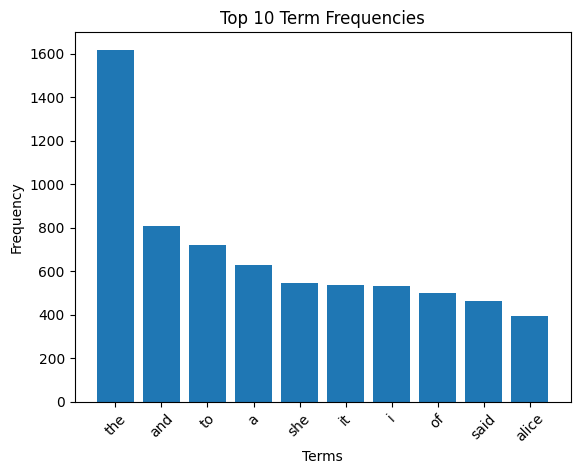

In [87]:
#Create a chart showing the frequency of the ten most popular terms:
top_ten_terms = term_frequencies.most_common(10)
terms, frequencies = zip(*top_ten_terms)
plt.bar(terms, frequencies)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Top 10 Term Frequencies")
plt.xticks(rotation=45)
plt.show()

In [88]:
#Compile a list of words often seen in the same context as "Alice":
context_words = [word for word, _ in tagged_words if word.lower() == "alice"]
adjacent_words = []
for i in range(len(context_words)):
    if i > 0:
        adjacent_words.append(tagged_words[i-1][0])
    if i < len(context_words) - 1:
        adjacent_words.append(tagged_words[i+1][0])
adjacent_word_frequencies = Counter(adjacent_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


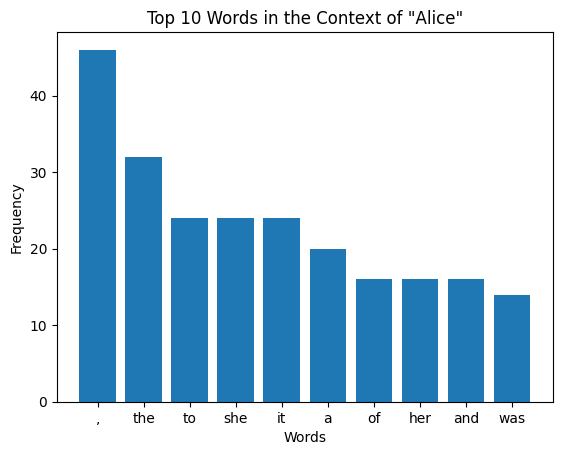

In [89]:
#Create a chart showing the top 10 words often seen in the same context as "Alice":
top_ten_context_words = adjacent_word_frequencies.most_common(10)

# Extract the words and their frequencies
words = [word for word, _ in top_ten_context_words]
frequencies = [freq for _, freq in top_ten_context_words]

# Create a bar chart to visualize the top 10 context words
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in the Context of "Alice"')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


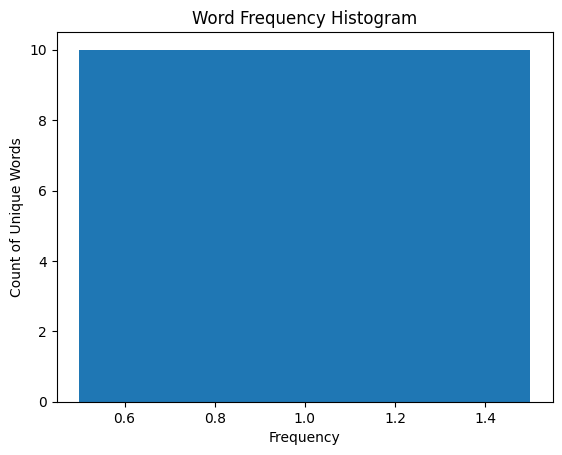

In [94]:
#create a word frequency histogram:
bins = list(range(1, max_frequency + 2))
word_frequencies = [sum(1 for count in word_counts.values() if count == bin) for bin in bins]

plt.bar(bins[:-1], word_frequencies, width=1)
plt.xlabel('Frequency')
plt.ylabel('Count of Unique Words')
plt.title('Word Frequency Histogram')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


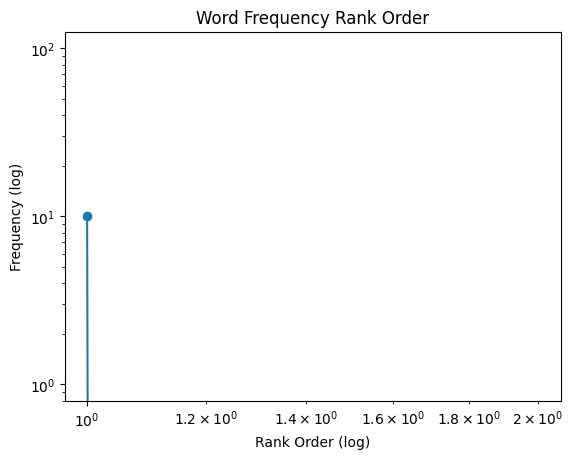

In [91]:
#a log-log scale, plot the rank order along the x-axis and the frequency along the yaxis.
import numpy as np

# Calculate the rank order of word frequencies
rank_order = np.arange(1, len(word_frequencies) + 1)

# Plot the rank order and word frequencies on a log-log scale
plt.loglog(rank_order, word_frequencies, marker='o')
plt.xlabel('Rank Order (log)')
plt.ylabel('Frequency (log)')
plt.title('Word Frequency Rank Order')
plt.show()
